In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [19]:
df=pd.read_excel(r"C:\Users\vedan\OneDrive\Desktop\Python viz\Bruno_leicester\Bruno_passing_1.xlsx")

In [26]:
# Sample data (Replace this with your actual DataFrame)

data = {
    "type": ["SavedShot", "MissedShots", "SavedShot", "Goal"],
    "x": [81.5, 78.1, 69, 81.3],
    "y": [50.5, 53.6, 63.2, 47.2],
    "goal_mouth_y": [47.4, 44.2, 51.7, 54.1],  # Goal location
    #"goal_mouth_z": [19, 84.7, 19, 14.6],  # Height of the shot
    "blocked_x": [86.7, None, 71.5, None],  # Where shot was blocked (if applicable)
    "blocked_y": [49.6, None, 62.3, None]
}

df = pd.DataFrame(data)
df['x']=df['x']*1.2
df['y']=df['y']*0.8
df['blocked_x']=df['blocked_x']*1.2
df['blocked_y']=df['blocked_y']*0.8

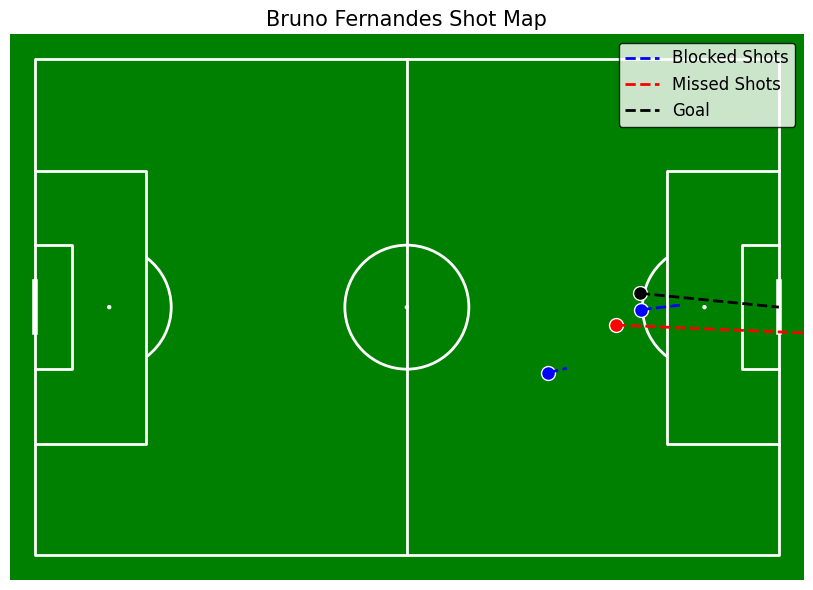

In [39]:

# Initialize pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')

fig, ax = pitch.draw(figsize=(10, 6))

# Define colors for shot types
shot_colors = {
    "Goal": "black",
    "MissedShots": "red",
    "SavedShot": "blue"
}
# Dictionary to store legend handles
legend_handles = {}

for _, row in df.iterrows():
    color = shot_colors.get(row['type'], 'white')  # Default to white if unknown

    # Determine end location:
    if pd.notna(row['blocked_x']):
        end_x, end_y = row['blocked_x'], row['blocked_y']  # Blocked shot
    elif row["type"] == "Goal" or row["type"] == "SavedShot":
        end_x, end_y = 120, 40  # Send shot into the goal
    else:
        end_x, end_y = 125, row['goal_mouth_y']  # Send missed shot beyond goal

    # Plot shot path
    line, = plt.plot([row['x'], end_x], [row['y'], end_y], color=color, linewidth=2, linestyle='dashed', label=row["type"])
    
    # Mark the starting point (where the shot was taken)
    scatter = plt.scatter(row['x'], row['y'], color=color, edgecolor='white', s=100)

    # Store legend handles (only once per shot type)
    if row["type"] not in legend_handles:
        legend_handles[row["type"]] = line
plt.legend(legend_handles.values(), ['Blocked Shots', 'Missed Shots', 'Goal'], loc='upper right', fontsize=12, frameon=True, facecolor='white', edgecolor='black')
# Add title
plt.title("Bruno Fernandes Shot Map", color='black', fontsize=15)

# Show plot
plt.show()


In [38]:
legend_handles.keys()

dict_keys(['SavedShot', 'MissedShots', 'Goal'])